-----------
Plotting Indonesia trends


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python36_64\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


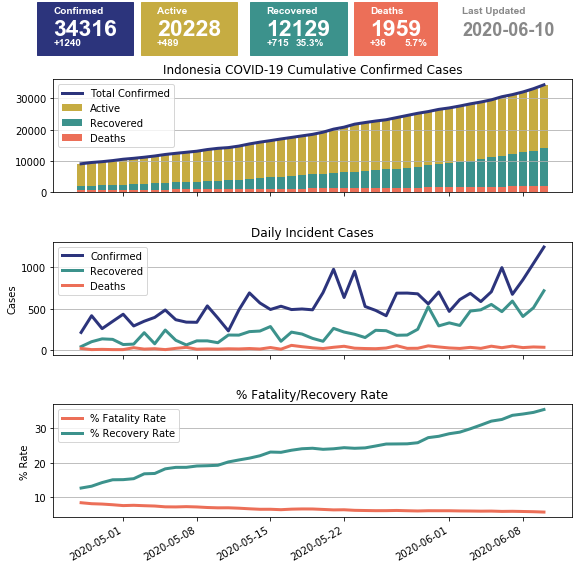

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import datetime

print("-----------")
print("Plotting Indonesia trends")

d_raw = pd.read_csv("C:/0Proj/VS2019/INACOVID/data/csv/arcgis.natl.csv")
d = d_raw.tail(45)
# fig.subplots_adjust(hspace=0.46, top=0.85, bottom=0)
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8,8))

x = d["Date"]
x = pd.to_datetime(d["Date"])

Confirmed = d["Jumlah_Kasus_Kumulatif"] 
Deaths = d["Jumlah_Pasien_Meninggal"]
Cured = d["Jumlah_Pasien_Sembuh"]
Hosp = d["Jumlah_pasien_dalam_perawatan"]

DI_Confirmed = d["Jumlah_Kasus_Baru_per_Hari"] 
DI_Deaths = d["Jumlah_Kasus_Meninggal_per_Hari"]
DI_Cured = d["Jumlah_Kasus_Sembuh_per_Hari"]
DI_Hosp = d["Jumlah_Kasus_Dirawat_per_Hari"]

Pct_Cured = d["Persentase_Pasien_Sembuh"]
Pct_Dead = d["Persentase_Pasien_Meninggal"]

c_Confirmed = "#2c347c"
c_Hosp="#c6ac42"
c_Cured="#3c928c"
c_Deaths="#ec6f58"

df = pd.DataFrame({"Date": pd.to_datetime(d["Date"]),"Confirmed": d["Jumlah_Kasus_Kumulatif"], "Hospitalised":d["Jumlah_pasien_dalam_perawatan"], "Cured": d["Jumlah_Pasien_Sembuh"], "Deaths":d["Jumlah_Pasien_Meninggal"]})
df.index = x

axs[1].xaxis_date()
axs[0].xaxis_date()
# simulating stacked bar
axs[0].plot(x, Confirmed, color=c_Confirmed, label="Total Confirmed", linewidth=3)
axs[0].bar(x, Hosp + Cured + Deaths, color = c_Hosp, label="Active")
axs[0].bar(x, Cured + Deaths, color=c_Cured, label="Recovered")
axs[0].bar(x, Deaths, color=c_Deaths, label="Deaths")
axs[0].set_title("Indonesia COVID-19 Cumulative Confirmed Cases")
axs[0].legend()
axs[0].grid(axis="y")

axs[1].plot(x, DI_Confirmed, color=c_Confirmed, label="Confirmed", linewidth=3)
axs[1].plot(x, DI_Cured, color=c_Cured, label="Recovered", linewidth=3)
axs[1].plot(x, DI_Deaths, color=c_Deaths, label="Deaths", linewidth=3)
axs[1].set_title("Daily Incident Cases")
axs[1].legend()
axs[1].set_ylabel("Cases")
axs[1].grid(axis="y")

axs[2].plot(x, Pct_Dead, color=c_Deaths, label="% Fatality Rate", linewidth=3)
axs[2].plot(x, Pct_Cured, color=c_Cured, label="% Recovery Rate", linewidth=3)
axs[2].set_title("% Fatality/Recovery Rate")
axs[2].legend()
axs[2].set_ylabel("% Rate")
axs[2].grid(axis="y")

fig.autofmt_xdate()

dd = d_raw.tail(1)
last_updated = dd.iloc[0,0]
latest_confirmed = dd.iloc[0,6]
latest_cured = dd.iloc[0,7]
latest_deaths = dd.iloc[0,9] 
latest_hosp = dd.iloc[0,8]

latest_recov = dd.iloc[0,10] 
latest_fatal = dd.iloc[0,11] 

DI_latest_confirmed = dd.iloc[0,2] 
DI_latest_hosp = dd.iloc[0,4] 
DI_latest_cured = dd.iloc[0,3] 
DI_latest_deaths = dd.iloc[0,5] 

plt.gcf().text(0.78, 0.918, last_updated, color="#888888", fontsize=18, family="Arial", weight="bold", bbox=dict(facecolor="none", edgecolor="none",  boxstyle='square,pad=.7'))
plt.gcf().text(0.78, 0.955, "Last Updated", color="#888888", fontsize=10,  family="Arial", weight="bold")

plt.gcf().text(0.07, 0.918, latest_confirmed, color="#ffffff", fontsize=23, family="Arial", weight="bold", bbox=dict(facecolor=c_Confirmed, edgecolor=c_Confirmed,  boxstyle='square, pad=.7'))
plt.gcf().text(0.07, 0.955, "Confirmed", color="#ffffff", fontsize=10,  family="Arial", weight="bold")
plt.gcf().text(0.07, 0.9, '+' + str(DI_latest_confirmed), color="#ffffff", fontsize=10,  family="Arial", weight="bold")

plt.gcf().text(0.44, 0.918, latest_cured, color="#ffffff", fontsize=23,  family="Arial", weight="bold", bbox=dict(facecolor=c_Cured, edgecolor=c_Cured,  boxstyle='square,pad=.7'))
plt.gcf().text(0.44, 0.955, "Recovered", color="#ffffff", fontsize=10,  family="Arial", weight="bold")
plt.gcf().text(0.44, 0.9, '+' + str(DI_latest_cured), color="#ffffff", fontsize=10,  family="Arial", weight="bold")
plt.gcf().text(0.49, 0.9, f"{latest_recov/100:.1%}", color="#ffffff", fontsize=10,  family="Arial", weight="bold")

plt.gcf().text(0.62, 0.918, latest_deaths, color="#ffffff", fontsize=23,  family="Arial", weight="bold", bbox=dict(facecolor=c_Deaths, edgecolor=c_Deaths,  boxstyle='square,pad=.7'))
plt.gcf().text(0.62, 0.9, '+' +str(DI_latest_deaths), color="#ffffff", fontsize=10,  family="Arial", weight="bold")
plt.gcf().text(0.62, 0.955, "Deaths", color="#ffffff", fontsize=10,  family="Arial", weight="bold")
plt.gcf().text(0.68, 0.9, f"{latest_fatal/100:.1%}", color="#ffffff", fontsize=10,  family="Arial", weight="bold")

plt.gcf().text(0.25, 0.918, latest_hosp, color="#ffffff", fontsize=23, family="Arial", weight="bold", bbox=dict(facecolor=c_Hosp, edgecolor=c_Hosp,  boxstyle='square, pad=.7'))
plt.gcf().text(0.25, 0.955, "Active", color="#ffffff", fontsize=10,  family="Arial", weight="bold")
plt.gcf().text(0.25, 0.9, '+' + str(DI_latest_hosp), color="#ffffff", fontsize=10,  family="Arial", weight="bold")


fig.subplots_adjust(hspace=0.44, top=0.84, left=0.07, bottom=0.08, right=0.97)

plt.show()
